<a href="https://colab.research.google.com/github/petrascarvalho/Modelo_de_Regress-o_para_MKT/blob/main/Modelo_de_Regress%C3%A3o_para_MKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Bibliotecas para regressão linear

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [ ]:
# Extraindo o arquivo para analise

vendas = pd.read_csv('/content/MKT.csv')
vendas = pd.DataFrame(vendas)
vendas.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# Verificando o tipo do objeto e analisando se há brancos ou nulos.

vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
# Renomeando as colunas

vendas = vendas.rename(columns={'youtube': 'Investimento_youtube', 'facebook':'Investimento_facebook', 'newspaper':'Investimento_newspaper', 'sales':'Valor_das_vendas' })
vendas.head()

,Investimento_youtube,Investimento_facebook,Investimento_newspaper,Valor_das_vendas
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# comando describe para apurar as medias x percentuais

vendas.describe()

,Investimento_youtube,Investimento_facebook,Investimento_newspaper,Valor_das_vendas
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
# criando uma correlação entre os dados

vendas.corr()

,Investimento_youtube,Investimento_facebook,Investimento_newspaper,Valor_das_vendas
Investimento_youtube,1.000000,0.086538,0.110759,0.782030
Investimento_facebook,0.086538,1.000000,0.293425,0.602918
Investimento_newspaper,0.110759,0.293425,1.000000,0.254987
Valor_das_vendas,0.782030,0.602918,0.254987,1.000000


<Axes: >

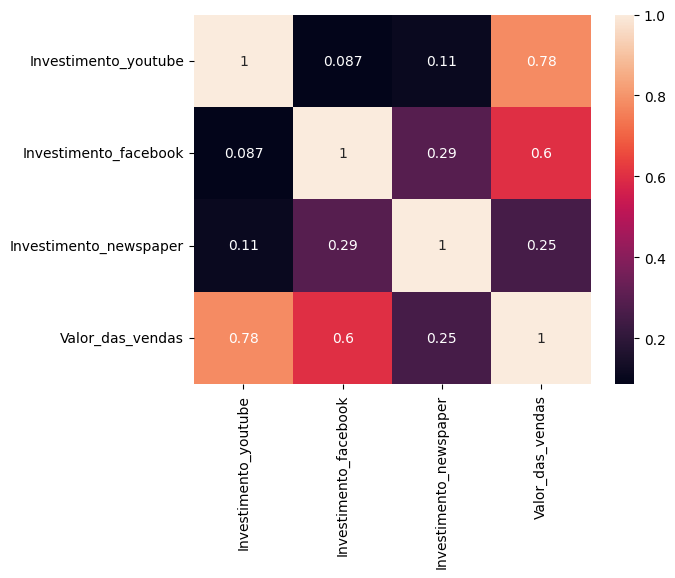

In [ ]:
# heatmap para identificar correlações entre os Investimentos com as plataformas x Valor das Vendas


sns.heatmap(vendas.corr(), annot=True)

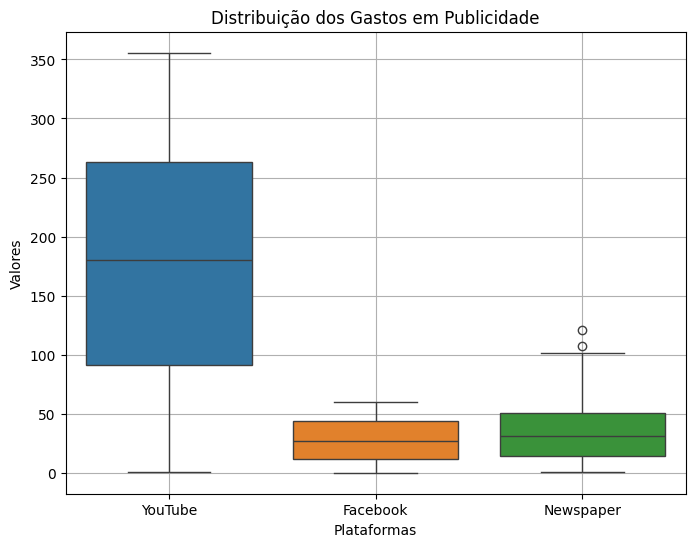

In [ ]:
#Gerando um grafico para mensurar a distribuação dos gastos

plt.figure(figsize=(8, 6))
sns.boxplot(data=vendas[['Investimento_youtube', 'Investimento_facebook', 'Investimento_newspaper']])
plt.title('Distribuição dos Gastos em Publicidade')
plt.ylabel('Valores')
plt.xlabel('Plataformas')
plt.xticks([0, 1, 2], ['YouTube', 'Facebook', 'Newspaper'])
plt.grid(True)
plt.show()

# MODELING TECHNIQUES

1. Regressão Linear do SKLEARN https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

2. Support Vector Regression do SKLEARN https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

3. Decision Tree Regression do XGBoost https://xgboost.readthedocs.io/en/stable/python/python_api.html

Modeling Assumptions:

Apenas variaveis numéricas

# TEST DESIGN

# Dataset split:
Separação de TRAIN/TEST dataset padrão com 20% de massa para teste via medoto SKLEARN https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Métrica de avaliação do modelo:

Validação da métrica MSE e RMSE para penalizar grandes erros de previsão. Utilizando o método SKLEARN https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html#sklearn.metrics.root_mean_squared_error

In [ ]:
# Atribuindo as variáveis de investimentos (features)

X = vendas[['Investimento_youtube', 'Investimento_facebook', 'Investimento_newspaper']]

# Atribuindo a variáveis de valor de venda (target)

y = vendas['Valor_das_vendas']

In [ ]:
# Criando o design de test com as metricas de avaliação MSE e RMSE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Utilizando a técnica de treinamento (Regressão Linear)

reg_linear = LinearRegression().fit(X_train, y_train)

In [ ]:
# Utilizando técnicas de predição

ypred_linear = reg_linear.predict(X_test)

In [ ]:
# Calculando o MSE

MSE_linear = mean_squared_error(y_test, ypred_linear)

In [ ]:
# Imprimindo o MSE e RMSE
print('MSE linear:', MSE_linear)
print('RMSE linear:', np.sqrt(MSE_linear))

MSE linear: 5.576790234026713
RMSE linear: 2.361522863329236


# TECNICA 2. SVR - SUPORT VECTOR REGRESSION

In [ ]:
# Utilizando a técnica de treinamento (Suport Vector Regression)

reg_SVR = SVR().fit(X_train, y_train)

In [ ]:
# Utilizando técnicas de predição

ypred_SVR = reg_SVR.predict(X_test)

In [ ]:
# Calculando o MSE

MSE_SVR = mean_squared_error(y_test, ypred_SVR)

In [ ]:
# Imprimindo o MSE e RMSE

print('MSE SVR:', MSE_SVR)
print('RMSE SVR:', np.sqrt(MSE_SVR))

MSE SVR: 7.945113616628386
RMSE SVR: 2.8187077919905756


# TECNICA 3. Decision Tree Regression do XGBoost

In [ ]:
# Utilizando a técnica de treinamento (Tree Regression do XGBoost)

reg_XGB = XGBRegressor().fit(X_train, y_train)

In [ ]:
# Utilizando técnicas de predição

ypred_XGB = reg_XGB.predict(X_test)

In [ ]:
# Calculando o MSE

MSE_XGB = mean_squared_error(y_test, ypred_XGB)

In [ ]:
# Imprimindo o MSE e RMSE

print('MSE XGB:', MSE_XGB)
print('RMSE XGB:', np.sqrt(MSE_XGB))

MSE XGB: 1.1465224826026794
RMSE XGB: 1.070757901022766
